<a href="https://colab.research.google.com/github/PaulaDiz/QUANTUM_COMPUTING/blob/main/HW_06_QTF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UFVQC 07 - Quantum Fourier Transform

### Objective
In this notebook we will implement a function that generates a Quantum Fourier Transform gate.

This will be akin to qiskit's `qiskit.circuit.library.QFT`. (https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.QFT)

1. Create the n-Rotation function
2. Create the general QFT function
2. Add the parameter to create a Inverse QFT

In [1]:
!pip install qiskit qiskit-ibm-runtime qiskit[visualization]

import qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.9/363.9 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 7.5 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=5fe623049e6c4554b66b22fb84dd4e720cc957324d0c4fba658091fae601e3b5
  Stored in d

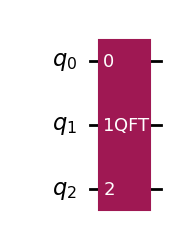

In [2]:
# The Qiskit QFT Circuit is able to generate a QuantumCircuit that implements the QFT for a given number of qubits.
# Here is an example
from qiskit.circuit.library import QFT

qc = QFT(3, inverse=False)
qc.draw('mpl')

#### `We are going to create our own QFT circuit generator`

### 1 - Create the n-Rotation function

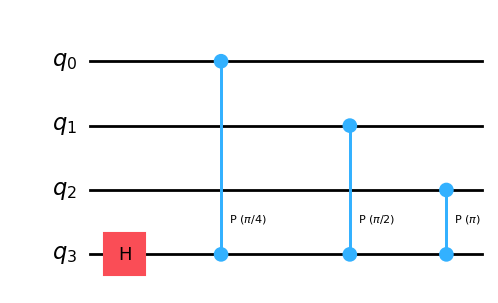

In [7]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from numpy import pi

def n_rotations(qc: QuantumCircuit, qubit_index: int):
    # Apply a hadamard gate
    qc.h(qubit_index)



    # For each qubit with a smaller index, do a Controlled Phase [qc.cp()] with a phase of pi/2**(qubit_index-smaller_index)
    for i in range(qubit_index):
        qc.cp(pi/2**(qubit_index-i-1), qubit_index, i)

    return None


test_qc = QuantumCircuit(4)
n_rotations(test_qc, 3)

test_qc.draw('mpl')

### 2 - Create the general QFT function

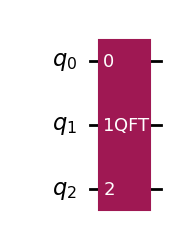

In [8]:
def homemade_QFT(n_qubits, inverse=False):
    # Create our QFT QC
    qc=QuantumCircuit(n_qubits)

    # Apply the n-rotations function we created for each qubit
    for i in range(n_qubits):
        n_rotations(qc,i)

    # Apply Swap gates for the necesary terms
    for i in range(n_qubits//2):
        qc.swap(i,n_qubits-i-1)

    # Convert our qc to a gate
    #qft = qft.to_gate(label="homemade_QFT")
    return qc

qft = homemade_QFT(3)

qc.draw('mpl')

### 3 - Add the parameter to implement the inverse QFT
Use the previous function and add functionality to the `inverse` parameter

In [16]:
def homemade_QFT(n_qubits, inverse=False):
    # Copy paste the previous code, but move the gate conversion to the end

    qc=QuantumCircuit(n_qubits)

    # Apply the n-rotations function we created for each qubit
    for i in range(n_qubits):
        n_rotations(qc,i)

    # Apply Swap gates for the necesary terms
    for i in range(n_qubits//2):
        qc.swap(i,n_qubits-i-1)

    # If the inverse flag is set, invert the circuit (there is a qiskit function for that, search in the docs...)
    if inverse == True :
      qc=qc.inverse()
      # Convert to gate
    qft = qc.to_gate(label="homemade_QFT")

    return qft

qft = homemade_QFT(3, True)

#qc = QuantumCircuit(3)
#qc.append(qft, [0, 1, 2])
#qc.draw('mpl')

#qft.draw('mpl')
#Para poder visualizar como tal lo que hay dentro del circuito no podemos convertirlo a gate.

### 4 - Test our circuit

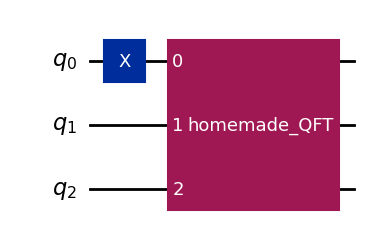

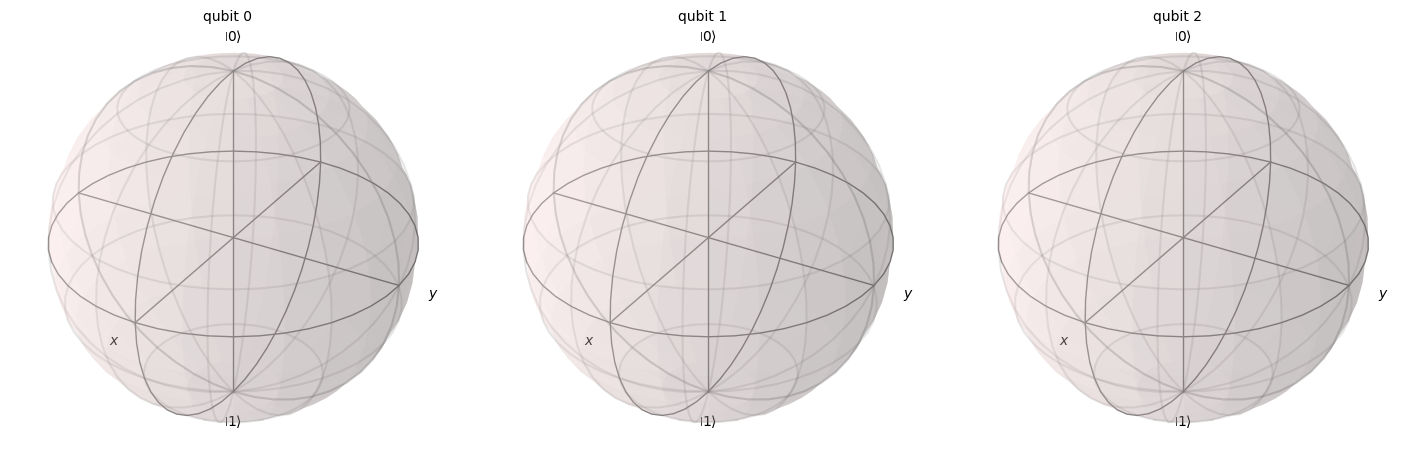

In [17]:
from qiskit.visualization import plot_bloch_multivector

qc = QuantumCircuit(3)
qc.x([0]) # Count to number 1
qc.append(homemade_QFT(3), range(3))

display(qc.draw('mpl'))
plot_bloch_multivector(qc)

# 5 - Test our circuit in a real case

We are given this circuit that encodes a value in the fourier basis, what is the value?

In [18]:
target_state_list = [
    1.76776695e-01+0.j,          -1.46984450e-01-0.09821187j,
   -6.76495125e-02+0.16332037j,   3.44874224e-02-0.17337998j,
   -1.25000000e-01+0.125j,        1.73379981e-01+0.03448742j,
   -1.63320371e-01-0.06764951j,   9.82118698e-02+0.14698445j,
   -1.08244507e-17+0.1767767j,   -9.82118698e-02+0.14698445j,
    1.63320371e-01-0.06764951j,  -1.73379981e-01+0.03448742j,
    1.25000000e-01+0.125j,       -3.44874224e-02-0.17337998j,
   -6.76495125e-02+0.16332037j,   1.46984450e-01-0.09821187j,
   -1.76776695e-01+0.j,           1.46984450e-01+0.09821187j,
   -6.76495125e-02-0.16332037j,  -3.44874224e-02+0.17337998j,
    1.25000000e-01-0.125j,       -1.73379981e-01+0.03448742j,
    1.63320371e-01+0.06764951j,  -9.82118698e-02-0.14698445j,
    1.08244507e-17-0.1767767j,    9.82118698e-02-0.14698445j,
   -1.63320371e-01+0.06764951j,   1.73379981e-01+0.03448742j,
   -1.25000000e-01-0.125j,        3.44874224e-02+0.17337998j,
    6.76495125e-02-0.16332037j,  -1.46984450e-01+0.09821187j
]
from qiskit.quantum_info import Statevector

target_state = Statevector(target_state_list)

# Create a QuantumCircuit with 5 qubits and 5 classical bits
qc_initialized = QuantumCircuit(5, 5, name="Unknown Fourier Value")

# Use initialize() to set the state
qc_initialized.initialize(target_state_list, range(5), normalize=True)


## qc_initialized is our circuit with a value in the fourier basis
qc_initialized.draw()

»
q_0: »
     »
q_1: »
     »
q_2: »
     »
q_3: »
     »
q_4: »
     »
c: 5/»
     »
«     ┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
«q_0: ┤0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            ├
«     │                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             │
«q_1: ┤1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            ├
«     │                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             │
«q_2: ┤2 Initialize(0.17678,-0.14698-0.098212j,-0.06765+0.16332j,0.034487-0.17338j,-0.125+0.125j,0.17338+0.034487j,-0.16332-0.06765j,0.098212+0.14698j,0.17678j,-0.098212+0.14698j,0.16332-0.06765j,-0.17338+0.034487j,0.125+0.125j,-0.034487-0.17338j,-0.06765+0.16332j,0.14698-0.098212j,-0.17678,0.14698+0.098212j,-0.06765-0.16332j,-0.034487+0.17338j,0.125-0.125j,-0.17338+0.034487j,0.16332+0.06765j,-0.098212-0.14698j,-0.17678j,0.098212-0.14698j,-0.16332+0.06765j,0.17338+0.034487j,-0.125-0.125j,0.034487+0.17338j,0.06765-0.16332j,-0.14698+0.098212j) ├
«     │                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             │
«q_3: ┤3                                                        

In [24]:
## Write some code to discover what this value is

#Si están en base de fourier habrá que aplicar la transformada inversa para
#volver a la base original

qc_initialized.append(homemade_QFT(5,inverse=True), range(5))
qc_initialized.measure(qc_initialized.qubits, range(5))


# TRANSPILACIÓN Y SIMULACIÓN DEL CIRCUITO.

from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime.fake_provider import FakeMelbourneV2  #procesador cuantico
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

fake_melbourne = FakeMelbourneV2()
pm = generate_preset_pass_manager(backend=fake_melbourne, optimization_level=1)

#SIMULACIÓN PARA EL CIRCUITO QC

isa_qc = pm.run(qc_initialized)

sampler = Sampler(mode=fake_melbourne)

job = sampler.run([isa_qc], shots=1000) #shots: cantidad de veces q lanzamos el circuito

# Lets see if the job has finished
job.status()

# Lets get the results
pub_result = job.result()[0]
print(pub_result)

pub_result.data.c.get_counts()



KeyboardInterrupt: 

In [6]:
# Take this as a tip
from qiskit.visualization import plot_histogram

plot_histogram(result.data.meas.get_counts())

NameError: name 'result' is not defined